In [1]:
# using Feedforward Neural Network
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings



In [57]:
# Load your dataset
df = pd.read_csv('filtered.csv')
df

,Age,Gender,Polyuria (frequent urination),Polydipsia(excessive thirst),sudden weight loss,weakness,Polyphagia(extreme hunger),Genital thrush(yeast infection),visual blurring,Itching,Irritability,delayed healing,partial paresis(weakening of a muscle or group of muscles),muscle stiffness (tightness in muscles),Alopecia (patchy hair loss),Obesity,Result
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
2,38,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1
3,35,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1
4,39,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
179,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [58]:
# Separate features (X) and target variable (y)
X = df.drop('Result', axis=1)
y = df['Result']
X

,Age,Gender,Polyuria (frequent urination),Polydipsia(excessive thirst),sudden weight loss,weakness,Polyphagia(extreme hunger),Genital thrush(yeast infection),visual blurring,Itching,Irritability,delayed healing,partial paresis(weakening of a muscle or group of muscles),muscle stiffness (tightness in muscles),Alopecia (patchy hair loss),Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
2,38,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0
3,35,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0
4,39,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
179,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Initialize a Sequential neural network model
model = tf.keras.models.Sequential()

In [62]:

# Add an input layer with the appropriate input shape (number of features)
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

In [63]:
# Add hidden layers
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

In [64]:

# Add an output layer with a single neuron and a sigmoid activation function
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [65]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [66]:

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)  # You can adjust the number of epochs and batch size

In [67]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {loss}")

2/2 [==============================] - 0s 3ms/step - loss: 0.0604 - mean_absolute_error: 0.0988
Mean Absolute Error: 0.09875258803367615
Mean Squared Error: 0.06037483364343643


In [116]:
# Predict for a single data point with symptoms

# new_data_point = np.array([[32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0]]) # 518th row Result=0

# new_data_point = np.array([[30,0,1,1,1,1,0,0,0,1,0,1,1,1,0,0]]) # 98th row Result =1

# new_data_point = np.array([[38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]) # 176th row Result =0

# new_data_point = np.array([[100,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1]]) # FALSE DATA row Result =1

new_data_point = np.array([[100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]) # FALSE DATA row Result =0



new_data_point = scaler.transform(new_data_point)
probability = model.predict(new_data_point)
print(f"Predicted Probability: {probability[0][0]}")


1/1 [==============================] - 0s 14ms/step
Predicted Probability: 0.9999386072158813


C:\ANACONDA_3_2023\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [117]:
# Optionally, we convert the probability to a scale of 1-100
scaled_probability = probability[0][0] * 100
print(f"Scaled Probability: {scaled_probability}")


Scaled Probability: 99.99386072158813


In [118]:
# Check if the patient is prone to diabetes based on a threshold

threshold = 0.5     # above 0.5 probablility model will be consider a patient is prone to diabetes
if probability[0][0] >= threshold:
    print("You are prone to diabetes.")
else:
    print("You are not prone to diabetes.")

You are prone to diabetes.


2/2 [==============================] - 0s 3ms/step


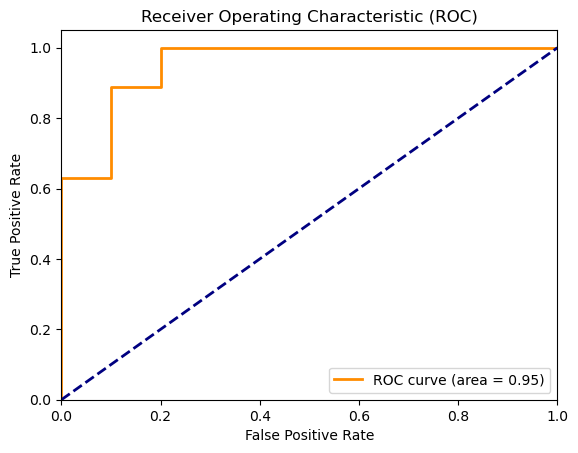

In [119]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


###### An ROC (Receiver Operating Characteristic) curve and its associated AUC (Area Under the Curve) value can provide insights into the performance of a binary classification model.
